In [346]:
# Reading in the data file and basic EDA.
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv("./../data/data.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [324]:
# Removing any of the null values.

df.isnull().sum()
# last column contains the null values. 

df.shape
#(569, 33)

df = df.iloc[:,0:32]
df.shape

df.head()
df.isnull().sum()
# No missing values.

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [326]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [327]:
df['diagnosis'].value_counts()

# Note: There are 145 more benign samples than malignant samples. 
# Must utilize stratified argument when splitting the data.

B    357
M    212
Name: diagnosis, dtype: int64

In [15]:
print("Number of IDs:",df['id'].count())
print("Number of unique IDs:",df['id'].nunique())

# All IDs in the dataset are unique, displaying no group structure. 

Number of IDs: 569
Number of unique IDs: 569


In [328]:
# There are IDs varying in the number of digits inputted, I am going to see if there is any correlation in the datasets.

df['id']

# However, there are IDs that are varying in number of digits. 
# This could potentially mean the patients are coming from the same hospital. 

max_value = 0
min_value = 9

for i in df['id'].index:
    temp = len(str(df['id'].iloc[i]))
    if max_value < temp:
        max_value = temp

print("Max character Value:",max_value)
# 9

for i in df['id'].index:
    temp = len(str(df['id'].iloc[i]))
    if min_value > temp:
        min_value = temp

print("Min character Value:",min_value)
# 4

df['id'].isnull().value_counts()

Max character Value: 9
Min character Value: 4


False    569
Name: id, dtype: int64

In [329]:
# Since the Minimum of id digits is 4 and the max is 9, I am going to construct lists for every ID digit count.

id_digit_4 = [] 
id_digit_5 = []
id_digit_6 = []
id_digit_7 = []
id_digit_8 = []
id_digit_9 = []

for i in df['id'].index:
    temp = len(str(df['id'].iloc[i]))
    if temp == 4:
        id_digit_4.append(df['id'].iloc[i])
    elif temp == 5:
        id_digit_5.append(df['id'].iloc[i])
    elif temp == 6:
        id_digit_6.append(df['id'].iloc[i])
    elif temp == 7:
        id_digit_7.append(df['id'].iloc[i])
    elif temp == 8:
        id_digit_8.append(df['id'].iloc[i])
    elif temp == 9:
        id_digit_9.append(df['id'].iloc[i])

print("IDs with 4 digits:",len(id_digit_4))
print("IDs with 5 digits:",len(id_digit_5))
print("Ids with 6 digits:",len(id_digit_6))
print("IDs with 7 digits:",len(id_digit_7))
print("IDs with 8 digits:",len(id_digit_8))
print("IDs with 9 digits:",len(id_digit_9))

IDs with 4 digits: 4
IDs with 5 digits: 37
Ids with 6 digits: 344
IDs with 7 digits: 103
IDs with 8 digits: 70
IDs with 9 digits: 11


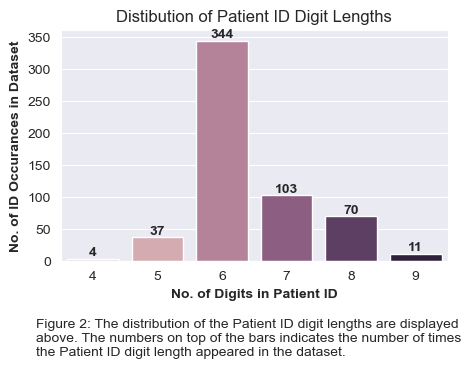

In [350]:
# Plotting the unique ID counts

data = {'ID Digit Number':[4,5,6,7,8,9],'Digit Length Count':[4,37,344,103,70,11],'Portion of Dataset':[0.7,6.5,60.4,18.1,12.3,1.9]}
df_digit_count = pd.DataFrame(data)
df_digit_count

text_caption = 'Figure 2: The distribution of the Patient ID digit lengths are displayed\n\
above. The numbers on top of the bars indicates the number of times\n\
the Patient ID digit length appeared in the dataset.'

plt.figure(figsize=(5,3)).text(0.075,-0.2,text_caption,horizontalalignment = 'left',wrap=True)
plot = sb.barplot(
    data=df_digit_count,
    x="ID Digit Number",
    y='Digit Length Count',
    palette=sb.cubehelix_palette(reverse=False)
)
plot.bar_label(plot.containers[0],weight=1000)
plot.set_xlabel('No. of Digits in Patient ID',weight=1000)
plot.set_ylabel('No. of ID Occurances in Dataset',weight=1000)
plot.set_title('Distibution of Patient ID Digit Lengths')
plt.savefig('./../figures/distribution_patient_ID_digit_lengths.png',dpi=400,bbox_inches='tight')
plt.show()

In [354]:
# Adding another column containing the ID character count.

# df = df.drop(columns=['id_digit_count'])
df.insert(1,'id_digit_count',np.nan)
df.head()

for i in df.index:
    temp = df.loc[i,'id']
    if temp in id_digit_4:
        df.loc[i,'id_digit_count'] = 4
    elif temp in id_digit_5:
        df.loc[i,'id_digit_count'] = 5
    elif temp in id_digit_6:
        df.loc[i,'id_digit_count'] = 6
    elif temp in id_digit_7:
        df.loc[i,'id_digit_count'] = 7
    elif temp in id_digit_8:
        df.loc[i,'id_digit_count'] = 8
    elif temp in id_digit_9:
        df.loc[i,'id_digit_count'] = 9

df.head()
# df['id_digit_count'].isnull().value_counts()
# Sanity Check
# False    569

,id,id_digit_count,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,6.0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,6.0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,8.0,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,8.0,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,8.0,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


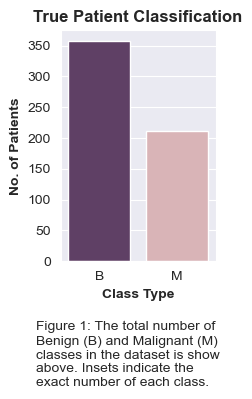

In [349]:
# The number of patients with Beneign and Malignant tumors 
diagnosis_classes = df.diagnosis.value_counts() 
diagnosis_classes = pd.DataFrame(diagnosis_classes)
diagnosis_classes = diagnosis_classes.transpose()

figure_caption = 'Figure 1: The total number of \n\
Benign (B) and Malignant (M) \n\
classes in the dataset is show\n\
above. Insets indicate the \n\
exact number of each class.'

plt.figure(figsize=(2,3)).text(0,-0.3,figure_caption,horizontalalignment = 'left',wrap=True)
sample_cmap = sb.cubehelix_palette(reverse=False,light=0.3,dark=2.5)
sb.set_style(style='darkgrid')
sb_plot = sb.barplot(
    data = diagnosis_classes,
    palette= sample_cmap
)
sb_plot.set_xlabel("Class Type",weight=1000)
sb_plot.set_ylabel("No. of Patients",weight=1000)
sb_plot.set_title("True Patient Classification",weight=1000)
plt.savefig('./../figures/class_types_in_dataset.png',dpi=400,bbox_inches='tight')
plt.show()

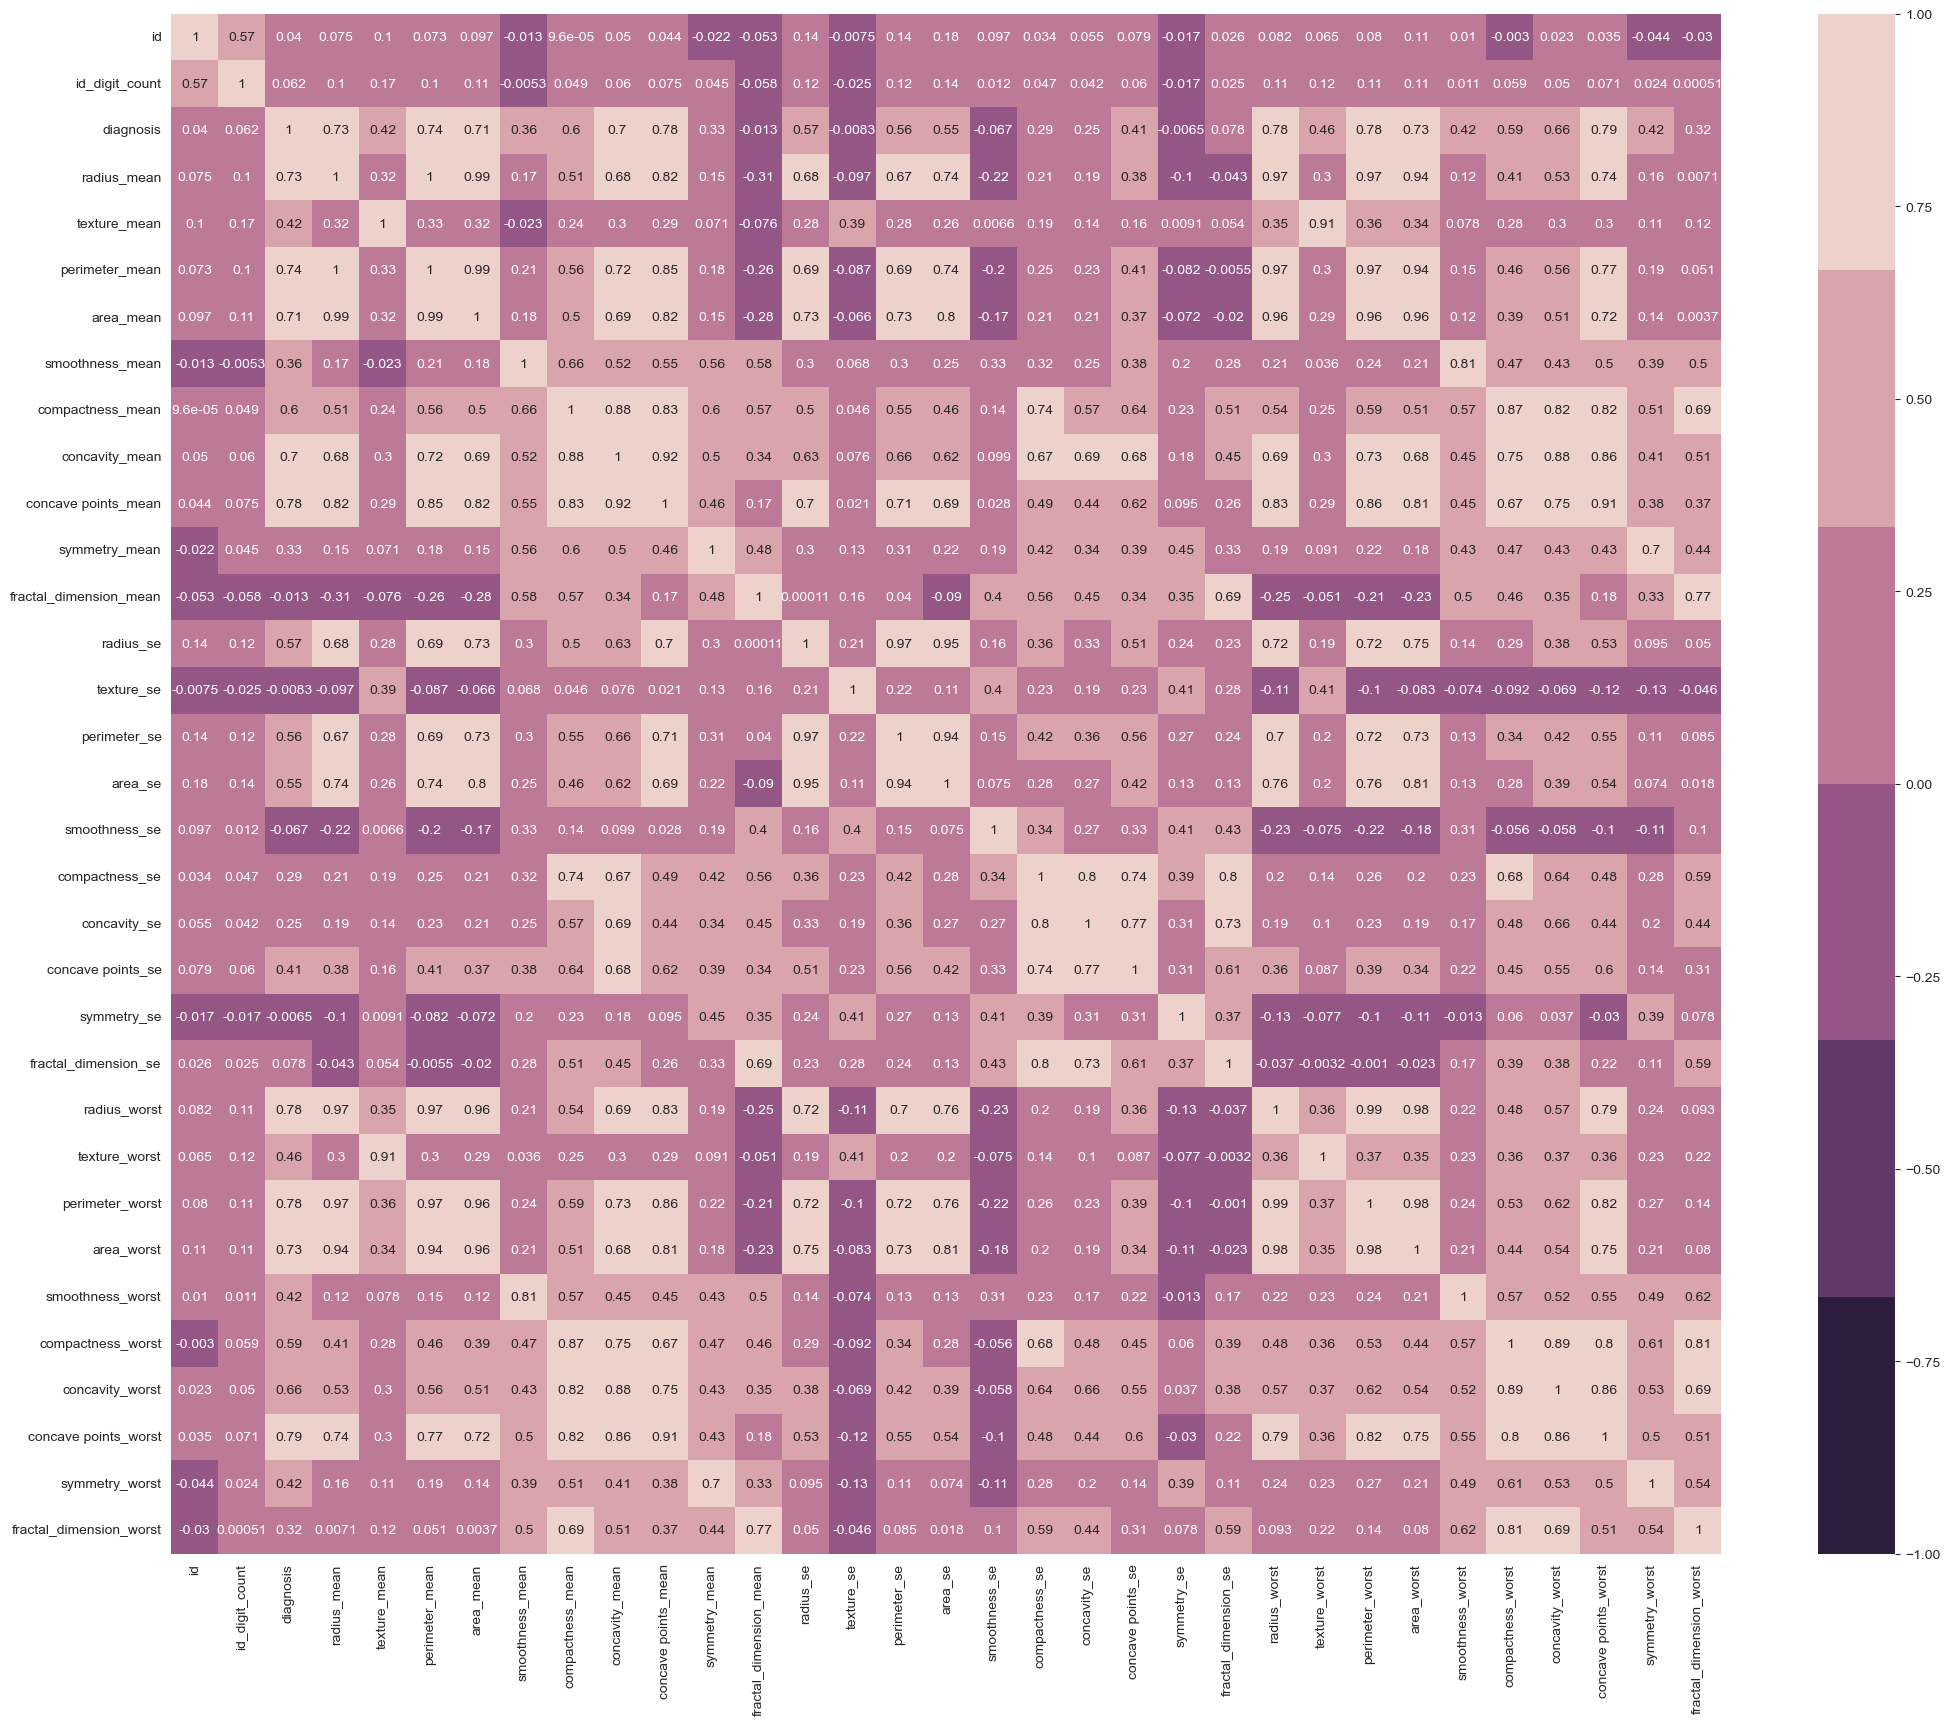

In [332]:
# Full Pearson Correlation Heatmap

df_diagnosis = df['diagnosis']
df_diagnosis.replace('B',0,inplace=True)
df_diagnosis.replace('M',1,inplace=True)

df_mean = df.iloc[:,1:13]
# df_mean.insert(0,'diagnosis',df_diagnosis)

df_se = df.iloc[:,12:22]
# df_se.insert(0,'diagnosis',df_diagnosis)

df_worst = df.iloc[:,22:32]
# df_worst.insert(0,'diagnosis',df_diagnosis)

df_corr = df.corr('pearson') # Correlation plot of all of the features together. 
df_mean_corr = df_mean.corr('pearson') # Correlation plot for 10 key features at a time.
df_se_corr = df_se.corr('pearson') # Correlation plot for 10 key features at a time.
df_worst_corr = df_worst.corr('pearson') # Correlation plot for 10 key features at a time.

plt.figure(figsize=(25,20))
sample_cmap = sb.cubehelix_palette(reverse=True)
sb.heatmap(df_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap)
# sb.heatmap(df_se_corr,annot=True,vmin=-1,vmax=1)
# sb.heatmap(df_worst_corr,annot=True,vmin=-1,vmax=1)
plt.show()

# The main idea was to see the correlation of the id_digit_count feature with the rest of the features.

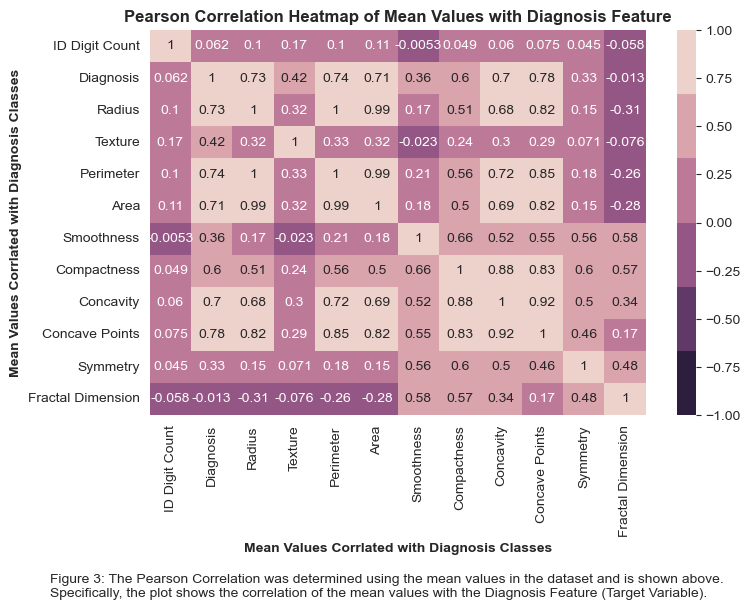

In [355]:
# Below are correlation heatmap, separated by Mean, SE, and worst values
# to observe difference easier. 

##### Preparing dfs for pearson correlation
df_diagnosis = df['diagnosis']
df_diagnosis.replace('B',0,inplace=True)
df_diagnosis.replace('M',1,inplace=True)

df_mean = df.iloc[:,1:13]
# df_mean.insert(0,'diagnosis',df_diagnosis)

df_se = df.iloc[:,12:22]
# df_se.insert(0,'diagnosis',df_diagnosis)

df_worst = df.iloc[:,22:32]
# df_worst.insert(0,'diagnosis',df_diagnosis)

df_corr = df.corr('pearson') # Correlation plot of all of the features together. 
df_mean_corr = df_mean.corr('pearson') # Correlation plot for 10 key features at a time.
df_se_corr = df_se.corr('pearson') # Correlation plot for 10 key features at a time.
df_worst_corr = df_worst.corr('pearson') # Correlation plot for 10 key features at a time.

##### Plotting the Heatmap 
figure_caption = 'Figure 3: The Pearson Correlation was determined using the mean values in the dataset and is shown above.\n\
Specifically, the plot shows the correlation of the mean values with the Diagnosis Feature (Target Variable).'

plt.figure(figsize=(8,5)).text(0,-0.25,figure_caption,horizontalalignment = 'left',wrap=True)

sample_cmap = sb.cubehelix_palette(reverse=True)
plot = sb.heatmap(df_mean_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap)
plot.set_title('Pearson Correlation Heatmap of Mean Values with Diagnosis Feature',weight=1000)
plot.set_ylabel('Mean Values Corrlated with Diagnosis Classes',weight=1000)
plot.set_xlabel('Mean Values Corrlated with Diagnosis Classes',weight=1000)
plot.set_yticklabels(['ID Digit Count','Diagnosis','Radius','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave Points','Symmetry','Fractal Dimension'])
plot.set_xticklabels(['ID Digit Count','Diagnosis','Radius','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave Points','Symmetry','Fractal Dimension'])

plt.savefig('./../figures/corr_heatmap_mean_values_wDiagnosis_feature.png',dpi=400,bbox_inches='tight')
plt.show()

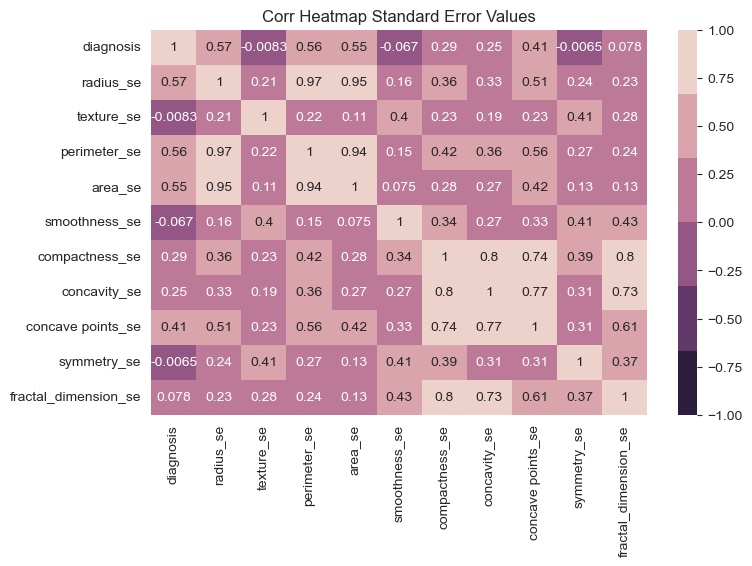

In [259]:
# Below are correlation heatmap, separated by Mean, SE, and worst values
# to observe difference easier. 

df_diagnosis = df['diagnosis']
df_diagnosis.replace('B',0,inplace=True)
df_diagnosis.replace('M',1,inplace=True)

df_mean = df.iloc[:,1:13]
# df_mean.insert(0,'diagnosis',df_diagnosis)

df_se = df.iloc[:,12:22]
# df_se.insert(0,'diagnosis',df_diagnosis)

df_worst = df.iloc[:,22:32]
# df_worst.insert(0,'diagnosis',df_diagnosis)

df_corr = df.corr('pearson') # Correlation plot of all of the features together. 
df_mean_corr = df_mean.corr('pearson') # Correlation plot for 10 key features at a time.
df_se_corr = df_se.corr('pearson') # Correlation plot for 10 key features at a time.
df_worst_corr = df_worst.corr('pearson') # Correlation plot for 10 key features at a time.

plt.figure(figsize=(8,5))
sample_cmap = sb.cubehelix_palette(reverse=True)
# sb.heatmap(df_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap)
# sb.heatmap(df_mean_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap).set_title('Corr Heatmap Mean Values')
sb.heatmap(df_se_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap).set_title("Corr Heatmap Standard Error Values")
# sb.heatmap(df_worst_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap)
plt.show()

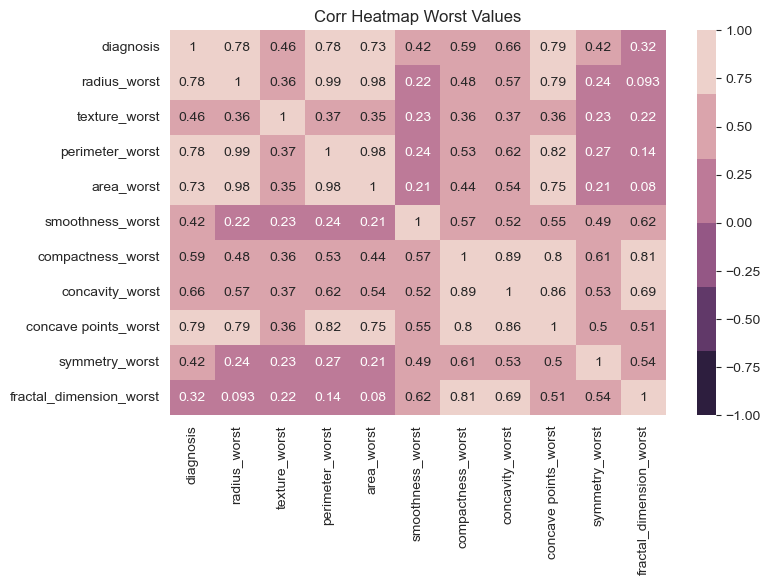

In [260]:
# Below are correlation heatmap, separated by Mean, SE, and worst values
# to observe difference easier. 

df_diagnosis = df['diagnosis']
df_diagnosis.replace('B',0,inplace=True)
df_diagnosis.replace('M',1,inplace=True)

df_mean = df.iloc[:,1:13]
# df_mean.insert(0,'diagnosis',df_diagnosis)

df_se = df.iloc[:,12:22]
# df_se.insert(0,'diagnosis',df_diagnosis)

df_worst = df.iloc[:,22:32]
# df_worst.insert(0,'diagnosis',df_diagnosis)

df_corr = df.corr('pearson') # Correlation plot of all of the features together. 
df_mean_corr = df_mean.corr('pearson') # Correlation plot for 10 key features at a time.
df_se_corr = df_se.corr('pearson') # Correlation plot for 10 key features at a time.
df_worst_corr = df_worst.corr('pearson') # Correlation plot for 10 key features at a time.

plt.figure(figsize=(8,5))
sample_cmap = sb.cubehelix_palette(reverse=True)
# sb.heatmap(df_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap)
# sb.heatmap(df_mean_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap).set_title('Corr Heatmap Mean Values')
# sb.heatmap(df_se_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap).set_title("Corr Heatmap Standard Error Values")
sb.heatmap(df_worst_corr,annot=True,vmin=-1,vmax=1,cmap=sample_cmap).set_title("Corr Heatmap Worst Values")
plt.show()

/var/folders/4l/5n9f3bws5kqbpycb404wch7r0000gn/T/ipykernel_93214/2127392647.py:13: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plot = sb.histplot(df, x="radius_mean", hue="diagnosis", element="step",bins=int(bins),palette=sample_cmap)


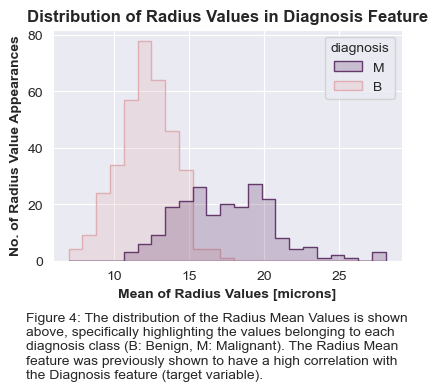

In [351]:
# Histogram plot of the Malignant and the beneign patients using radius mean value.

bins = np.sqrt(len(df_mean['radius_mean']))
figure_caption = 'Figure 4: The distribution of the Radius Mean Values is shown\n\
above, specifically highlighting the values belonging to each\n\
diagnosis class (B: Benign, M: Malignant). The Radius Mean \n\
feature was previously shown to have a high correlation with \n\
the Diagnosis feature (target variable).'

plt.figure(figsize=(4.5,3)).text(0.065,-0.275,figure_caption,horizontalalignment = 'left',wrap=True)

sample_cmap = sb.cubehelix_palette(reverse=False,light=0.3,dark=2.5)
plot = sb.histplot(df, x="radius_mean", hue="diagnosis", element="step",bins=int(bins),palette=sample_cmap)
plot.set_xlabel("Mean of Radius Values [microns]",weight=1000)
plot.set_ylabel("No. of Radius Value Appearances",weight=1000)
plot.set_title('Distribution of Radius Values in Diagnosis Feature',weight=1000)
plt.savefig("./../figures/distribution_radius_values_wIn_diagnosis_classes.png",bbox_inches="tight",dpi=400)
plt.show()


/var/folders/4l/5n9f3bws5kqbpycb404wch7r0000gn/T/ipykernel_93214/4145461213.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  plot = sb.histplot(df, x="fractal_dimension_mean", hue="diagnosis", element="step",bins=int(bins),palette=sample_cmap)


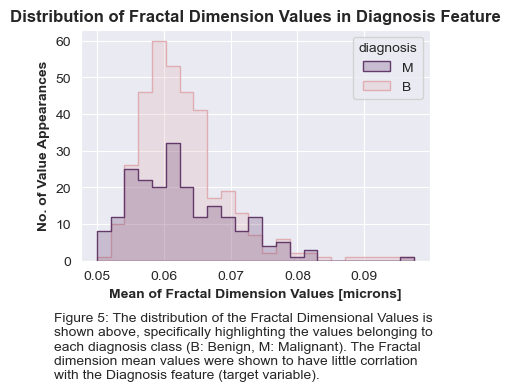

In [352]:
# Histogram plot of the Malignant and the beneign patients using radius mean value.

bins = np.sqrt(len(df['fractal_dimension_mean']))

figure_caption = 'Figure 5: The distribution of the Fractal Dimensional Values is\n\
shown above, specifically highlighting the values belonging to\n\
each diagnosis class (B: Benign, M: Malignant). The Fractal \n\
dimension mean values were shown to have little corrlation \n\
with the Diagnosis feature (target variable).'

plt.figure(figsize=(4.5,3)).text(0.065,-0.275,figure_caption,horizontalalignment = 'left',wrap=True)

sample_cmap = sb.cubehelix_palette(reverse=False,light=0.3,dark=2.5)
plot = sb.histplot(df, x="fractal_dimension_mean", hue="diagnosis", element="step",bins=int(bins),palette=sample_cmap)
plot.set_xlabel("Mean of Fractal Dimension Values [microns]",weight=1000)
plot.set_ylabel("No. of Value Appearances",weight=1000)
plot.set_title('Distribution of Fractal Dimension Values in Diagnosis Feature',weight=1000)
plt.savefig("./../figures/distribution_fractal_dim_values_wIn_diagnosis_classes.png",bbox_inches="tight",dpi=400)
plt.show()


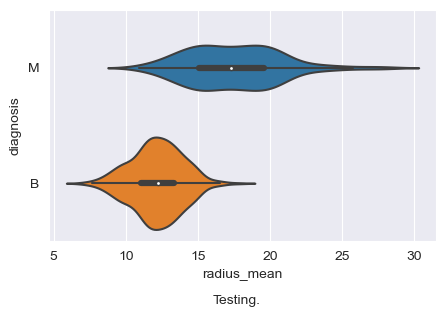

In [163]:
plt.figure(figsize=(5,3)).text(0.5,-0.1,"Testing.",horizontalalignment = 'center',wrap=True)
sb.violinplot(
    data = df,
    x = 'radius_mean',
    y = 'diagnosis'
)
plt.show()

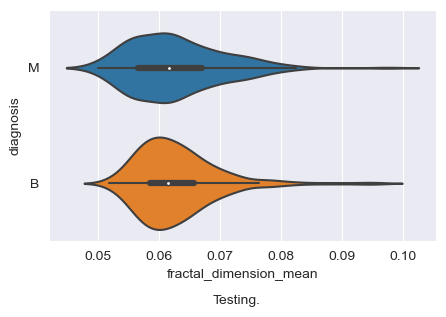

In [165]:
plt.figure(figsize=(5,3)).text(0.5,-0.1,"Testing.",horizontalalignment = 'center',wrap=True)
sb.violinplot(
    data = df,
    x = 'fractal_dimension_mean',
    y = 'diagnosis'
)
plt.show()

In [251]:
# Performing basic split on the data set. 
from sklearn.model_selection import train_test_split

def basic_split(X,y,train_size,val_size,test_size,random_state):
    """ Returning the X_train, y_train, X_val, y_val, X_test, y_test values. """
    
    #### test the inputs ####
    if ((train_size + val_size + test_size) != 1.0) or (isinstance(random_state, int) != True):
        raise ValueError("Either values for train, val, and test are not equal to one. And/Or, random state is not an integer.")
    
    #### perform basic split ####
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size=train_size,random_state=random_state,stratify=y,shuffle=True)

    # Here, correctly weighting the val and test values.
    val_test_size = val_size + test_size # Size of test and val sets.
    val_size_input = val_size / val_test_size # Percent of val for test/val combinded set.

    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size=val_size_input,stratify=y_other,random_state=random_state)

    #### test the outputs ####
    
    # Here, I am determining the percent composition of each set.
    X_train_split_size = X_train.shape[0] / (X_train.shape[0] + X_val.shape[0] + X_test.shape[0])
    X_val_split_size = X_val.shape[0] / (X_train.shape[0] + X_val.shape[0] + X_test.shape[0])
    X_test_split_size = X_test.shape[0] / (X_train.shape[0] + X_val.shape[0] + X_test.shape[0])
    
    y_train_split_size = y_train.shape[0] / (y_train.shape[0] + y_val.shape[0] + y_test.shape[0])
    y_val_split_size = y_val.shape[0] / (y_train.shape[0] + y_val.shape[0] + y_test.shape[0])
    y_test_split_size = y_test.shape[0] / (y_train.shape[0] + y_val.shape[0] + y_test.shape[0])
    
    # The following conditions are checking whether the set percent 
    # compositions are out of range. 
    if (X_train_split_size > (train_size + 0.0025)) or (X_train_split_size < (train_size - 0.0025)) or \
        (y_train_split_size > (train_size + 0.0025)) or (y_train_split_size < (train_size - 0.0025)):
        raise ValueError("The X and/or y training sets are improperly split.")

    elif (X_val_split_size > (val_size + 0.0025)) or (X_val_split_size < (val_size - 0.0025)) or \
        (y_val_split_size > (val_size + 0.0025)) or (y_val_split_size < (val_size - 0.0025)):
        raise ValueError("The X and/or y val sets are improperly split.")

    elif (X_test_split_size > (test_size + 0.0025)) or (X_test_split_size < (test_size - 0.0025)) or \
        (y_test_split_size > (test_size + 0.0025)) or (y_test_split_size < (test_size - 0.0025)):
        raise ValueError("The X and/or y test sets are improperly split.")

    return X_train, y_train, X_val, y_val, X_test, y_test



In [252]:
df.head(1)

X = df.drop(columns=["diagnosis",'id'])
y = df['diagnosis']
print(X.shape,y.shape)

X_train, y_train, X_val, y_val, X_test, y_test = basic_split(X,y,0.6,0.2,0.2,22)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
# (341, 30) (341,) (114, 30) (114,) (114, 30) (114,)

(569, 31) (569,)
(341, 31) (341,) (114, 31) (114,) (114, 31) (114,)


In [253]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

xgb_cl = xgb.XGBClassifier(max_depth=20,random_state=22)
xgb_cl.fit(X_train_scaled,y_train)

print(xgb_cl.score(X_train_scaled,y_train),xgb_cl.score(X_test_scaled,y_test))

[15:09:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0 0.9736842105263158


/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/utils/extmath.py:980: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/sklearn/utils/extmath.py:1005: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1